# Github Repository analysis 2020

<img src="https://camo.githubusercontent.com/5806488e6563b58f90ece7330731dc4bac7b8060/68747470733a2f2f7265732e636c6f7564696e6172792e636f6d2f646576706f73742f696d6167652f66657463682f732d2d51484743706e574b2d2d2f68747470733a2f2f6769746875622e636f6d2f6e70656e7472656c2f6f63746f636c697070792f626c6f622f6d61737465722f676966732f656172732e67696625334672617725334474727565" width="200">

GitHub is a web-based version-control and collaboration platform for software developers. ... GitHub facilitates social coding by providing a web interface to the Git code repository and management tools for collaboration. GitHub can be thought of as a serious social networking site for software developers.

I have Scraped top stared repositories from GitHub with different topics. I hvae used Python BeautifulSoup to scrape the data . Main motivation behind this data is to analyze top github stared repositories.

I have selcted some topics like Data-Science, Machine-Learning, Computer-Vision, etc. Then I have fatched most stared 100 repository details including repository commits,issue,fork, etc.

## Please!!! Upvote this kernel if you find it useful.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/github-repositories-analysis/Github_data.csv


### Import Data

In [2]:
Github_data = pd.read_csv("../input/github-repositories-analysis/Github_data.csv")

In [3]:
Github_data.head()

,Unnamed: 0,Unnamed: 0.1,topic,name,user,star,fork,watch,issue,pull_requests,...,topic_tag,discription_text,discription_url,commits,branches,packages,releases,contributers,License,url
0,0,0,Data-Science,keras,keras-team,47.9k,18.1k,2.1k,"2,940",87,...,"['deep-learning', 'tensorflow', 'neural-networ...",Deep Learning for humans,http://keras.io/,"5,342",6,0,0,49,View license,https://github.com/keras-team/keras
1,1,1,Data-Science,scikit-learn,scikit-learn,40.3k,19.6k,2.2k,"1,505",764,...,"['machine-learning', 'python', 'statistics', '...",scikit-learn: machine learning in Python,https://scikit-learn.org,"25,405",21,0,0,108,View license,https://github.com/scikit-learn/scikit-learn
2,2,2,Data-Science,PythonDataScienceHandbook,jakevdp,23.1k,9.9k,1.5k,65,67,...,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",Python Data Science Handbook: full text in Jup...,http://jakevdp.github.io/PythonDataSc…,234,5,0,0,0,View license,https://github.com/jakevdp/PythonDataScienceHa...
3,3,3,Data-Science,Probabilistic-Programming-and-Bayesian-Methods...,CamDavidsonPilon,21k,6.6k,1.4k,127,38,...,"['bayesian-methods', 'pymc', 'mathematical-ana...","aka ""Bayesian Methods for Hackers"": An introdu...",http://camdavidsonpilon.github.io/Pro…,"1,079",3,0,0,0,MIT,https://github.com/CamDavidsonPilon/Probabilis...
4,4,4,Data-Science,Data-Science--Cheat-Sheet,abhat222,18.4k,8.2k,1.5k,7,0,...,[],Cheat Sheets,NaN,363,3,0,0,0,Fetching contributors,https://github.com/abhat222/Data-Science--Chea...


* In Dataset,
Column **'Unnamed: 0'** is Index **and** Column **'Unnamed: 0.1'** is stand for sub_index **(Topic wise indexing)**

In [4]:
Github_data = Github_data.rename(columns={'Unnamed: 0': 'index', 'Unnamed: 0.1': 'sub_index'})
Github_data.drop('index', axis=1, inplace=True)
Github_data.reset_index(drop=True, inplace=True)

In [5]:
Github_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 20 columns):
sub_index           1500 non-null int64
topic               1500 non-null object
name                1500 non-null object
user                1500 non-null object
star                1500 non-null object
fork                1500 non-null object
watch               1500 non-null object
issue               1500 non-null object
pull_requests       1500 non-null object
projects            1313 non-null float64
topic_tag           1500 non-null object
discription_text    1480 non-null object
discription_url     669 non-null object
commits             1500 non-null object
branches            1500 non-null object
packages            1500 non-null int64
releases            1500 non-null int64
contributers        1500 non-null object
License             1500 non-null object
url                 1500 non-null object
dtypes: float64(1), int64(3), object(16)
memory usage: 234.5+ KB


### **Imp**
* I have found that at row 700 issue column have value "5000+" unwanted + there so can't chage it to numerical befor removeing it 


In [6]:
Github_data.at[700, 'issue'] = str(5000)

### converting number with comma numerical **1,234 **to **1234**

In [7]:
Numerical_columns = ["star","fork","watch","issue","pull_requests","projects","commits","branches","packages","releases","contributers"]
# Github_data[Numerical_columns] = Github_data[Numerical_columns].apply(lambda x: x.replace(',','').astype(float) if ',' in str(x) else x)
Github_data[Numerical_columns] = Github_data[Numerical_columns].fillna(0)
Github_data["issue"] = Github_data["issue"].apply(lambda x: x.replace(',', '') if ',' in x else x).astype(float)
Github_data["pull_requests"] = Github_data["pull_requests"].apply(lambda x: x.replace(',', '') if ',' in x else x).astype(float)
Github_data["commits"] = Github_data["commits"].apply(lambda x: x.replace(',', '') if ',' in x else x).astype(float)
Github_data["branches"] = Github_data["branches"].apply(lambda x: x.replace(',', '') if ',' in x else x).astype(float)
Github_data["contributers"] = Github_data["contributers"].apply(lambda x: x.replace(',', '') if ',' in x else x).astype(float)

### Column **Star, Fork, Watch** conatains number **(1.2K)** format, we need to convert into **(1200)** format

In [8]:
Github_data['star'] = Github_data['star'].apply(lambda x: float(x.replace('k',''))*1000 if 'k' in x else x)
Github_data['fork'] = Github_data['fork'].apply(lambda x: float(x.replace('k',''))*1000 if 'k' in x else x)
Github_data['watch'] = Github_data['watch'].apply(lambda x: float(x.replace('k',''))*1000 if 'k' in x else x)

### Processing on column **topic_tag**

In [9]:
import ast
unique_tags = []
Github_data['topic_tag'].apply(lambda x: unique_tags.append(ast.literal_eval(x)))
# unique_tags = list(set([item for sublist in unique_tags for item in sublist]))
all_tag = np.array([item for sublist in unique_tags for item in sublist])
unique, counts = np.unique(all_tag, return_counts=True)
print("Total number of tags in 1500 repository : ",len(all_tag))
print("Total number of unique tags in 1500 repository : ",len(unique))
tag_dataframe = pd.DataFrame({"unique":unique,"counts":counts})
tag_dataframe = tag_dataframe.sort_values(['counts'],ascending=[False])

Total number of tags in 1500 repository :  8729
Total number of unique tags in 1500 repository :  3288


### Top Repository tags used by users

In [10]:
fig = px.bar(tag_dataframe[:20],x="unique",y="counts",color='counts')
fig.show()

* we can see above machine-learning and deeplearning tags are used more then 200 times 

### Repository star distribution topic wise****

In [11]:
Github_data['star'] = Github_data['star'].astype(float)
star_topicwise = Github_data.groupby('topic').sum()['star']
fig = px.bar(star_topicwise,x=star_topicwise.index,y="star",color=star_topicwise.index)
fig.show()

* we can see here javascript topic has most stared repository (total 4M+)
* also we know that machie-learning is most usable tags rather then machine-learning repository are not stared as much as java-script
* Android-studio, opencv, sensor,variational-encoder are thos topic which accumulated sum are very low
* Data-science,computer-vision is most hot topic these days but data-science repositerys are not as much stared compared to oter topics

### Repository Fork distribution

In [12]:
Github_data['fork'] = Github_data['fork'].astype(float)
fork_topicwise = Github_data.groupby('topic').sum()['fork']
fig = px.bar(fork_topicwise,x=fork_topicwise.index,y="fork",color=fork_topicwise.index)
fig.show()

* we can see here similarity between repository star and forks
* java-script's repository are most stared and forked also

### Repository watch distribution

In [13]:
Github_data['watch'] = Github_data['watch'].astype(float)
watch_topicwise = Github_data.groupby('topic').sum()['watch']
fig = px.bar(watch_topicwise,x=watch_topicwise.index,y="watch",color=watch_topicwise.index)
fig.show()

* we can see same similarity in topic-wise here like star and fork.

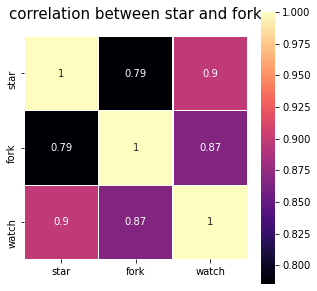

In [14]:
colormap = plt.cm.magma
plt.figure(figsize=(5,5))
plt.title('correlation between star and fork', y=1.05, size=15)
sns.heatmap(Github_data[['star','fork','watch']].corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

* star and watch are more correlatd (0.9)
* star and fork is less correlated compare to other two

**(Star & watch) > (Fork & watch) > (star > fork)**

### All numeric columns correlation

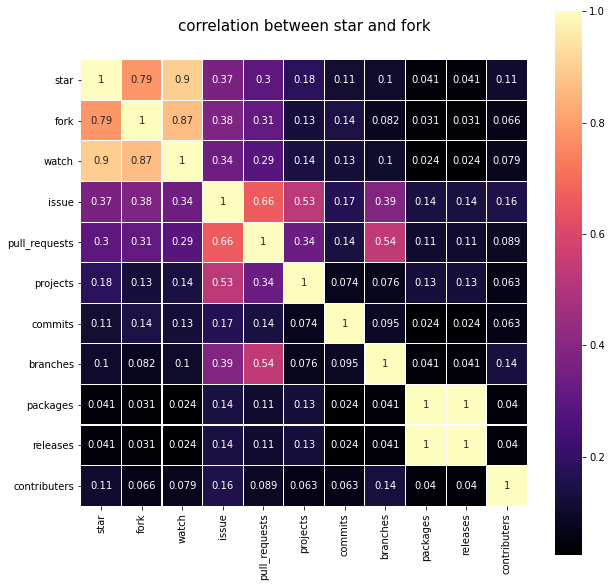

In [15]:
plt.figure(figsize=(10,10))
plt.title('correlation between star and fork', y=1.05, size=15)
sns.heatmap(Github_data[Numerical_columns].corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

* there are many columns are un correlated

### Commit Distribution topic wise

In [16]:
commit_topicwise = Github_data.groupby('topic').sum()['commits']
fig = px.pie(commit_topicwise, values='commits', names=commit_topicwise.index, title='Commit Distribution topic wise')
fig.show()

* Defenetly Raspberry-pi topic have less star and forks but it wins in commits 

### Issue Distribution 

In [17]:
issue_topicwise = Github_data.groupby('topic').sum()['issue']
fig = px.bar(issue_topicwise,x=issue_topicwise.index,y="issue",color=issue_topicwise.index)
fig.show()

* same as like stars and forks

In [18]:
contributers_topicwise = Github_data.groupby('topic').sum()['contributers']
fig = go.Figure(data=[go.Pie(labels=contributers_topicwise.index, values=contributers_topicwise.values, hole=.3)])
fig.show()

* Java-Script again win the game 
* Data-Science and c++ topics are came forward. they are not at 2nd and 3rd place in star and fork repository 

### License Distribution

In [19]:
License_distribution = Github_data["License"].apply(lambda x: x if'\n' not in x else None).value_counts()
fig = px.bar(y=License_distribution.values, x=License_distribution.index)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

# Top 10 repository analysis topic wise

### 1) Star

In [20]:
github_group = Github_data.groupby('topic')
num_of_top_repository = 10
fig = go.Figure()
for name, group in github_group:
    
    fig.add_trace(go.Bar(
    x=list(range(1,num_of_top_repository+1)),
    y=group["star"].values[:num_of_top_repository+1],
    name=name,
    ))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

* java-script repository havs more stars then other repository

### 2) Fork

In [21]:
github_group = Github_data.groupby('topic')
num_of_top_repository = 10
fig = go.Figure()
for name, group in github_group:
    
    fig.add_trace(go.Bar(
    x=list(range(1,num_of_top_repository+1)),
    y=group["fork"].values[:num_of_top_repository+1],
    name=name,
    ))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

* machine-learning repositories are more forked then java-scriped repositories rether then java-script repositories are more stared

In [22]:
github_group = Github_data.groupby('topic')
num_of_top_repository = 10
fig = go.Figure()
for name, group in github_group:
    
    fig.add_trace(go.Bar(
    x=list(range(1,num_of_top_repository+1)),
    y=group["contributers"].values[:num_of_top_repository+1],
    name=name,
    ))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

* here we can see some different senerio 
* more stared repositories have less contributers

# stay tuned for upcoming more analysis...

## Please!!! Upvote this kernel if you find it useful.